<a href="https://colab.research.google.com/github/tamannak12/Price_Predicition_LSTM_model/blob/main/Price_Prediction_LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing dataset

In [53]:
dataset_train=pd.read_csv("/content/Google_Stock_Price_Train.csv")
training_set=dataset_train.iloc[:,1:2].values

#Feature Scaling

In [69]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [70]:
X_train=[]
y_train=[]
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train), np.array(y_train)

X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#Importing Keras libs

In [71]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#Initialize RNN

In [72]:
regressor=Sequential()

#Adding LSTM Layer

In [73]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [75]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [76]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Output layer

In [78]:
regressor.add(Dense(units=1))

#Compile RNN

In [79]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

#Fitting RNN to the Training set

In [80]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - loss: 0.1065
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 0.0068
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0056
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 0.0054
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0053
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0058
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 0.0044
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0047
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0043
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0051
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0043
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0054
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 0.0042
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0038
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/

#Importing Testing dataset

In [81]:
dataset_test=pd.read_csv("/content/Google_Stock_Price_Test.csv")
real_stock_price=dataset.iloc[:,1:2].values

#Prediction of stock price of 2017

In [82]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['High']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 886ms/step


#Visualization

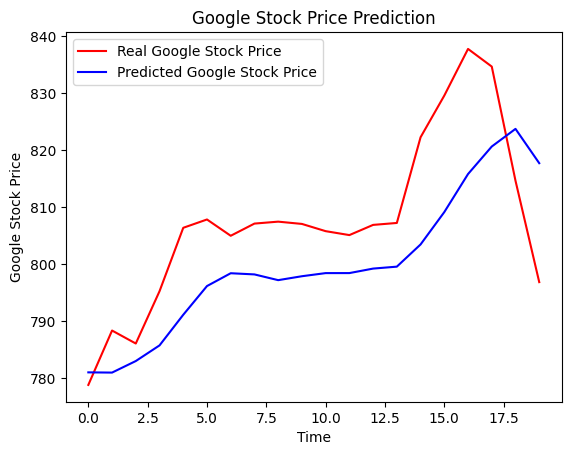

In [83]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

#Calculating Accuracy

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Absolute Error:', mean_absolute_error(real_stock_price, predicted_stock_price))
print('Mean Squared Error:', mean_squared_error(real_stock_price, predicted_stock_price))
print('R2 Score:', r2_score(real_stock_price, predicted_stock_price))

Mean Absolute Error: 10.93821484375
Mean Squared Error: 151.51086470765034
R2 Score: 0.3028843935324824
